In [1]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import cv2
import multiprocessing
import os
import sys
import shutil
import numpy as np
from PIL import Image
import os
import string
from pickle import dump
from pickle import load
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.text import Tokenizer #for text tokenization
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense #Keras to build our CNN and LSTM
from keras.layers import LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm #to check loop progress
tqdm().pandas()
import PIL.Image

C:\Users\KRIDAY PARMAR\AppData\Local\Temp\ipykernel_19372\2420117865.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [2]:
cam = cv2.VideoCapture("C:/Users/KRIDAY PARMAR/Downloads/meatzoo.mp4")

In [3]:
fps=cam.get(cv2.CAP_PROP_FPS)
fps

15.0

In [4]:
try: 
      
    # creating a folder named data 
    if not os.path.exists('video2image'): 
        os.makedirs('video2image') 
  
    # if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 

n=0
i=0
while True:
    ret,frame=cam.read()
    if(2*n)%fps==0:
        name = 'C:/Users/KRIDAY PARMAR/Flickr/video2image/frame' + str(i) + '.jpg'
        cv2.imwrite(name,frame)
        i+=1
    n+=1
    if ret==False:
        break
cam.release()
cv2.destroyAllWindows()

In [5]:
from keras.preprocessing.image import load_img
def extract_features(filename):
    model=Xception(include_top=False, pooling="avg")
    image = load_img(filename , target_size=(299,299))
    image = np.array(image)
    
    if image.shape[2] == 4:
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image / 127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo, sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

In [6]:
def get_image_caption(filename,model):
    tokenizer = load(open('tokenizer30k2.p','rb'))
    photo = extract_features(filename,)
    desc = generate_desc(model , tokenizer , photo , 72)
    desc = desc.replace('start','')
    desc = desc.replace('end','')
    return desc.title()

In [7]:
modelx = load_model('models/model30k2_2.h5')

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing On The Side Of The Road 


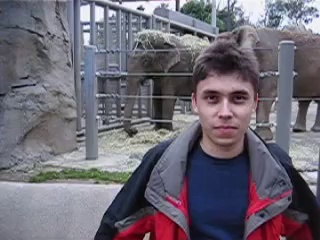

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


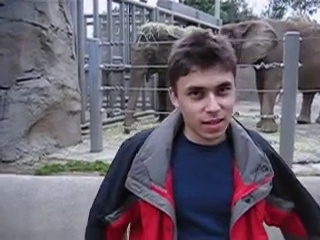

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing On The Side Of The Road 


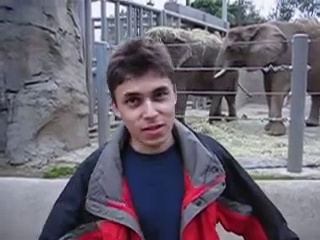

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing On The Side Of The Road 


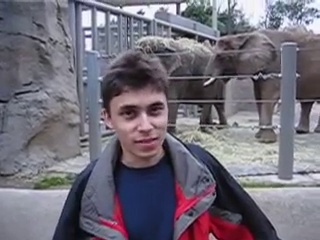

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


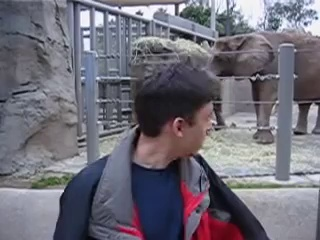

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing On The Side Of The Road 


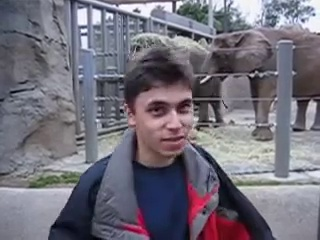

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing On The Side Of The Road 


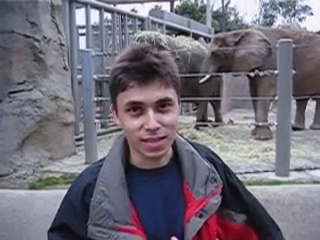

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


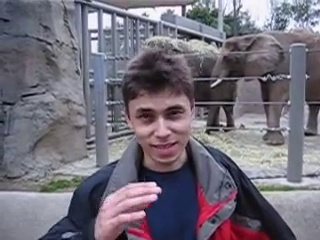

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


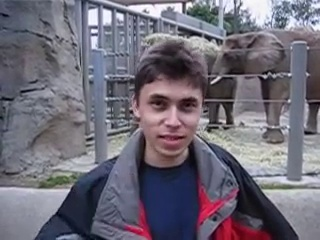

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


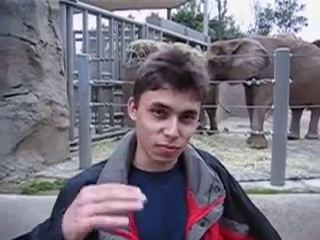

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


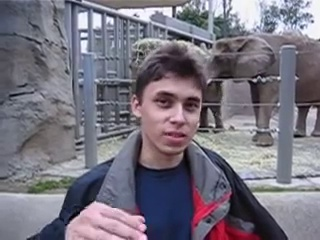

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


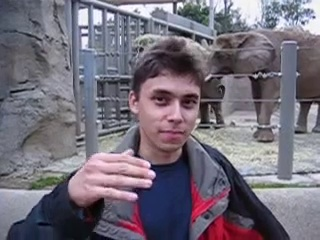

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


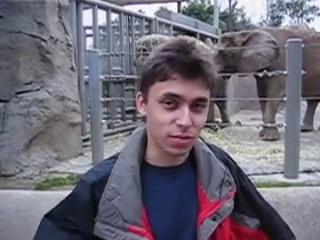

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


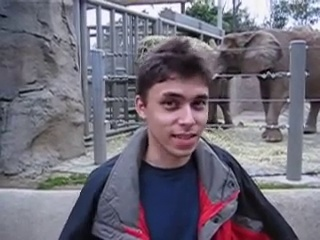

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


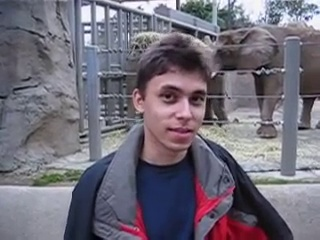

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


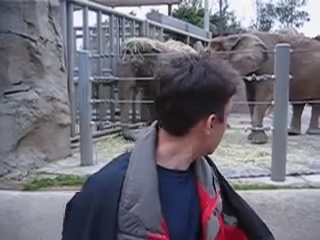

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


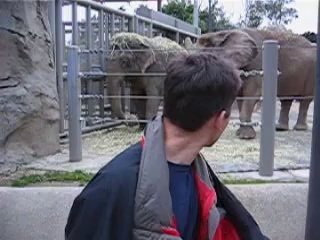

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


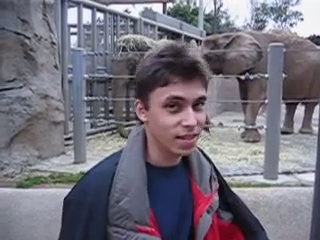

1/1 [==============================] - 2s 2s/step
 Man In Blue Shirt Is Standing In Front Of Building 


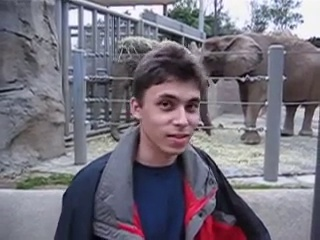

In [9]:
from IPython.display import Image,display
for a in range(0,i): 
    filename='C:/Users/KRIDAY PARMAR/Flickr/video2image/frame' + str(a) + '.jpg'
    print(get_image_caption(filename,modelx))
    display(Image(filename))

In [10]:
directoryName="video2image"
location="C:/Users/KRIDAY PARMAR/Flickr"
directoryPath=os.path.join(location,directoryName)
shutil.rmtree(directoryPath)